# Using DSP.jl

In [33]:
using LibSndFile, SampledSignals, DSP, Plots
pyplot();

In [34]:
function biquad_lpf(fc, Q=1/sqrt(2), samprate=44100)
    w = 2 * pi * fc / samprate;
    s = sin(w);
    c = cos(w);
    a = s / (2 * Q);

    b0 = (1 - c) / 2;
    b1 =  1 - c;
    b2 = (1 - c) / 2;
    a0 =  1 + a;
    a1 = -2 * c;
    a2 =  1 - a;

    return(Biquad(b0/a0, b1/a0, b2/a0, a1/a0, a2/a0));
end

biquad_lpf (generic function with 3 methods)

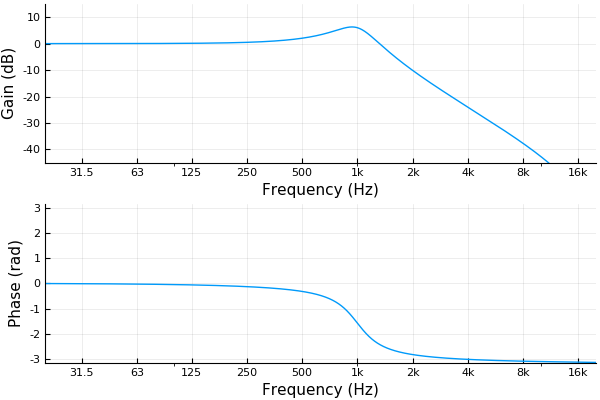

In [35]:
fs = 48000;
fltr = biquad_lpf(1000, 2, fs);
f = 20:20000;
A = freqz(fltr, f, fs);
res_power = plot(f, 20*log10.(abs.(A)),
    xscale=:log10, ylim=(-45, 15), legend=false,
    xticks=([31.5, 63, 125, 250, 500, 1000, 2000, 4000, 8000, 16000],
        ["31.5", "63", "125", "250", "500", "1k", "2k", "4k", "8k", "16k"]),
    xlabel="Frequency (Hz)", ylabel="Gain (dB)");
res_phase = plot(f, angle.(A),
    xscale=:log10, ylim=(-pi, +pi), legend=false,
    xticks=([31.5, 63, 125, 250, 500, 1000, 2000, 4000, 8000, 16000],
        ["31.5", "63", "125", "250", "500", "1k", "2k", "4k", "8k", "16k"]),
    xlabel="Frequency (Hz)", ylabel="Phase (rad)");
plot(res_power, res_phase, layout=grid(2,1))

In [36]:
savefig("20180401_filter_shape.png")

In [37]:
snd = load("guitar.wav");
y = filt(fltr, snd.data);
buf = SampleBuf(y, snd.samplerate);
save("output.wav", buf);

In [38]:
include("/Users/marui/Dropbox/_julia/audioutil.jl");

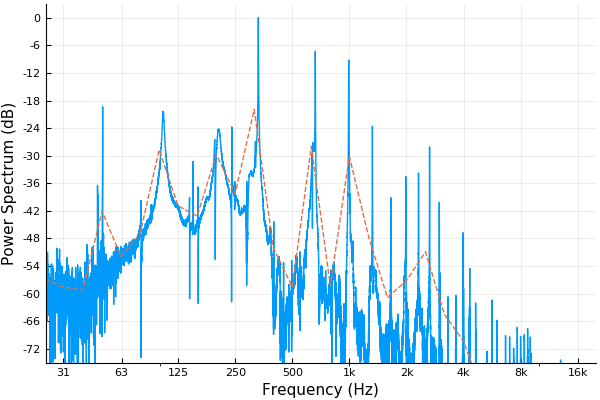

In [39]:
plot_magnitude(snd.data, snd.samplerate)

In [40]:
savefig("20180401_filter_before.png")

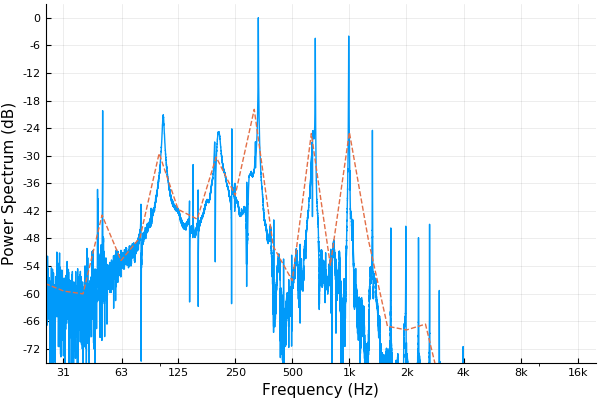

In [41]:
plot_magnitude(y, snd.samplerate)

In [42]:
savefig("20180401_filter_after.png")